In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()
sns.set(rc={"figure.dpi": 150})
sns.set_style("whitegrid", {"legend.frameon": True, "grid.linestyle": '--'})

## Vanilla-AE Results

In [39]:
ae_results = pd.read_csv("CUH_FBCs/ae_crossval.csv")
ae_results["target"].fillna('source', inplace=True)

In [40]:
ae_results.head(20)

fold  selection_score                                 selection_accuracy  \
0      1        -0.456104  [0.7453963423064119, 0.24192010422391527, 0.77...   
1      1              NaN                                                NaN   
2      1              NaN                                                NaN   
3      1              NaN                                                NaN   
4      1              NaN                                                NaN   
5      1              NaN                                                NaN   
6      1              NaN                                                NaN   
7      1              NaN                                                NaN   
8      1              NaN                                                NaN   
9      1              NaN                                                NaN   
10     1              NaN                                                NaN   
11     1              NaN                                                NaN   
12     1              NaN                                                NaN   
13     1              NaN                                                NaN   
14     1              NaN                                                NaN   
15     1              NaN                                                NaN   
16     1              NaN                                                NaN   
17     1              NaN                                                NaN   
18     1              NaN                                                NaN   
19     1              NaN                                                NaN   

    selection_variation  selection_reconstruction    type            task  \
0              1.022474                  0.020145  source             NaN   
1                   NaN                       NaN  source             Sex   
2                   NaN                       NaN  source             Sex   
3                   NaN                       NaN  source     age_bracket   
4                   NaN                       NaN  source     age_bracket   
5                   NaN                       NaN  source     age_bracket   
6                   NaN                       NaN  source     age_bracket   
7                   NaN                       NaN  source     age_bracket   
8                   NaN                       NaN  source     age_bracket   
9                   NaN                       NaN  source     age_bracket   
10                  NaN                       NaN  source     age_bracket   
11                  NaN                       NaN  source     age_bracket   
12                  NaN                       NaN  source     age_bracket   
13                  NaN                       NaN  source  Test Submitter   
14                  NaN                       NaN  source  Test Submitter   
15                  NaN                       NaN  target             Sex   
16                  NaN                       NaN  target             Sex   
17                  NaN                       NaN  target     age_bracket   
18                  NaN                       NaN  target     age_bracket   
19                  NaN                       NaN  target     age_bracket   

    task_label  accuracy  target domain  variation  
0          NaN       NaN  source    NaN        NaN  
1          0.0  0.820265  source    NaN        NaN  
2          1.0  0.627348  source    NaN        NaN  
3          0.0  0.042553  source    NaN        NaN  
4          1.0  0.000000  source    NaN        NaN  
5          2.0  0.084323  source    NaN        NaN  
6          3.0  0.276251  source    NaN        NaN  
7          4.0  0.105514  source    NaN        NaN  
8          5.0  0.276167  source    NaN        NaN  
9          6.0  0.183532  source    NaN        NaN  
10         7.0  0.434619  source    NaN        NaN  
11         8.0  0.274564  source    NaN        NaN  
12         9.0  

In [41]:
selection_scores = ae_results[ae_results["selection_score"].notna()].dropna(axis=1)
print("Accuracy means:")
acc_array = []
for acc_list in selection_scores["selection_accuracy"]:
    acc_array.append(eval(acc_list))
print(np.mean(acc_array, axis=0))

print("Rest of the means:")
print(selection_scores[["selection_score","selection_variation", "selection_reconstruction"]].mean())

Accuracy means:
[0.74606058 0.24247037 0.77162675]
Rest of the means:
selection_score            -0.523137
selection_variation         1.088570
selection_reconstruction    0.021286
dtype: float64


In [42]:
per_class_acc = ae_results[ae_results["task_label"].notna()].dropna(axis=1)
per_class_acc.groupby(["task", "type", "task_label"]).mean()

fold  accuracy
task           type   task_label                
Sex            source 0.0          3.0  0.826342
                      1.0          3.0  0.631090
               target 0.0          3.0  0.830313
                      1.0          3.0  0.643318
Test Submitter source 0.0          3.0  0.896004
                      1.0          3.0  0.522150
               target 0.0          3.0  0.913738
                      1.0          3.0  0.460479
age_bracket    source 0.0          3.0  0.032912
                      1.0          3.0  0.000000
                      2.0          3.0  0.086413
                      3.0          3.0  0.271717
                      4.0          3.0  0.106029
                      5.0          3.0  0.274485
                      6.0          3.0  0.182300
                      7.0          3.0  0.431741
                      8.0          3.0  0.267448
                      9.0          3.0  0.009560
               target 0.0          3.0  0.020981
                      1.0          3.0  0.000000
                      2.0          3.0  0.050915
                      3.0          3.0  0.203305
                      4.0          3.0  0.092905
                      5.0          3.0  0.300794
                      6.0          3.0  0.210047
                      7.0          3.0  0.412732
                      8.0          3.0  0.298392
                      9.0          3.0  0.009038

In [24]:
machine_pred = ae_results[ae_results["task"]=="Source Machine Prediction"].dropna(axis=1)
machine_pred["accuracy"].mean()

0.7141509380441337

In [26]:
variations = ae_results[ae_results["variation"].notna()].dropna(axis=1)
variations.groupby(["type", "domain"]).mean()
# variations

fold  variation
type   domain                      
source Analyser ID   3.0   0.146087
       Season        3.0   0.187341
       vendelay      3.0   0.775419
target Analyser ID   3.0   0.386381
       Season        3.0   0.682796
       vendelay      3.0   0.533792

## Dis-AE Results

In [43]:
disae_results = pd.read_csv("CUH_FBCs/disae_crossval.csv")
disae_results["target"].fillna('source', inplace=True)

In [44]:
disae_results.head(20)

fold  selection_score                                 selection_accuracy  \
0      1        -0.136592  [0.7466988005888378, 0.24113855608584828, 0.74...   
1      1              NaN                                                NaN   
2      1              NaN                                                NaN   
3      1              NaN                                                NaN   
4      1              NaN                                                NaN   
5      1              NaN                                                NaN   
6      1              NaN                                                NaN   
7      1              NaN                                                NaN   
8      1              NaN                                                NaN   
9      1              NaN                                                NaN   
10     1              NaN                                                NaN   
11     1              NaN                                                NaN   
12     1              NaN                                                NaN   
13     1              NaN                                                NaN   
14     1              NaN                                                NaN   
15     1              NaN                                                NaN   
16     1              NaN                                                NaN   
17     1              NaN                                                NaN   
18     1              NaN                                                NaN   
19     1              NaN                                                NaN   

    selection_variation  selection_reconstruction    type            task  \
0              0.584805                  0.128777  source             NaN   
1                   NaN                       NaN  source             Sex   
2                   NaN                       NaN  source             Sex   
3                   NaN                       NaN  source     age_bracket   
4                   NaN                       NaN  source     age_bracket   
5                   NaN                       NaN  source     age_bracket   
6                   NaN                       NaN  source     age_bracket   
7                   NaN                       NaN  source     age_bracket   
8                   NaN                       NaN  source     age_bracket   
9                   NaN                       NaN  source     age_bracket   
10                  NaN                       NaN  source     age_bracket   
11                  NaN                       NaN  source     age_bracket   
12                  NaN                       NaN  source     age_bracket   
13                  NaN                       NaN  source  Test Submitter   
14                  NaN                       NaN  source  Test Submitter   
15                  NaN                       NaN  target             Sex   
16                  NaN                       NaN  target             Sex   
17                  NaN                       NaN  target     age_bracket   
18                  NaN                       NaN  target     age_bracket   
19                  NaN                       NaN  target     age_bracket   

    task_label  accuracy  target domain  variation  
0          NaN       NaN  source    NaN        NaN  
1          0.0  0.829084  source    NaN        NaN  
2          1.0  0.628909  source    NaN        NaN  
3          0.0  0.035256  source    NaN        NaN  
4          1.0  0.000000  source    NaN        NaN  
5          2.0  0.070602  source    NaN        NaN  
6          3.0  0.262366  source    NaN        NaN  
7          4.0  0.100145  source    NaN        NaN  
8          5.0  0.280899  source    NaN        NaN  
9          6.0  0.189831  source    NaN        NaN  
10         7.0  0.437731  source    NaN        NaN  
11         8.0  0.272790  source    NaN        NaN  
12         9.0  

In [45]:
selection_scores = disae_results[disae_results["selection_score"].notna()].dropna(axis=1)
print("Accuracy means:")
acc_array = []
for acc_list in selection_scores["selection_accuracy"]:
    acc_array.append(eval(acc_list))
print(np.mean(acc_array, axis=0))

print("Rest of the means:")
print(selection_scores[["selection_score","selection_variation", "selection_reconstruction"]].mean())

Accuracy means:
[0.74566328 0.24144462 0.73546082]
Rest of the means:
selection_score            -0.194158
selection_variation         0.630788
selection_reconstruction    0.137559
dtype: float64


In [46]:
per_class_acc = disae_results[disae_results["task_label"].notna()].dropna(axis=1)
per_class_acc.groupby(["task", "type", "task_label"]).mean()

fold  accuracy
task           type   task_label                
Sex            source 0.0          3.0  0.826092
                      1.0          3.0  0.630918
               target 0.0          3.0  0.826672
                      1.0          3.0  0.647176
Test Submitter source 0.0          3.0  0.897088
                      1.0          3.0  0.411701
               target 0.0          3.0  0.909348
                      1.0          3.0  0.375155
age_bracket    source 0.0          3.0  0.027536
                      1.0          3.0  0.000000
                      2.0          3.0  0.074095
                      3.0          3.0  0.261911
                      4.0          3.0  0.100372
                      5.0          3.0  0.292456
                      6.0          3.0  0.189448
                      7.0          3.0  0.438045
                      8.0          3.0  0.270073
                      9.0          3.0  0.006055
               target 0.0          3.0  0.020755
                      1.0          3.0  0.000000
                      2.0          3.0  0.047485
                      3.0          3.0  0.208649
                      4.0          3.0  0.092842
                      5.0          3.0  0.297468
                      6.0          3.0  0.203433
                      7.0          3.0  0.415484
                      8.0          3.0  0.290147
                      9.0          3.0  0.009261

In [31]:
machine_pred = disae_results[disae_results["task"]=="Source Machine Prediction"].dropna(axis=1)
machine_pred["accuracy"].mean()

0.554097576122728

In [32]:
variations = disae_results[disae_results["variation"].notna()].dropna(axis=1)
variations.groupby(["type", "domain"]).mean()
# variations

fold  variation
type   domain                      
source Analyser ID   3.0   0.037013
       Season        3.0   0.168229
       vendelay      3.0   0.644538
target Analyser ID   3.0   0.366523
       Season        3.0   0.709734
       vendelay      3.0   0.460422

## Normalised (high-dimensional) Data Results

In [34]:
raw_crossval_data = pd.read_csv("CUH_FBCs/highdim_crossval.csv")
raw_crossval_data["target"].fillna('source', inplace=True)

In [36]:
raw_crossval_data.groupby(["task", "type", "task_label"]).mean()

Unnamed: 0  fold  accuracy
task           type   task_label                            
Sex            source 0.0               58.0   3.0  0.827500
                      1.0               59.0   3.0  0.637895
               target 0.0               72.0   3.0  0.832356
                      1.0               73.0   3.0  0.652217
Test Submitter source 0.0               70.0   3.0  0.899592
                      1.0               71.0   3.0  0.529212
               target 0.0               84.0   3.0  0.916470
                      1.0               85.0   3.0  0.460786
age_bracket    source 0.0               60.0   3.0  0.032643
                      1.0               61.0   3.0  0.000000
                      2.0               62.0   3.0  0.090259
                      3.0               63.0   3.0  0.281736
                      4.0               64.0   3.0  0.111007
                      5.0               65.0   3.0  0.281272
                      6.0               66.0   3.0  0.193386
                      7.0               67.0   3.0  0.433246
                      8.0               68.0   3.0  0.271636
                      9.0               69.0   3.0  0.013100
               target 0.0               74.0   3.0  0.024335
                      1.0               75.0   3.0  0.000000
                      2.0               76.0   3.0  0.053016
                      3.0               77.0   3.0  0.210319
                      4.0               78.0   3.0  0.097483
                      5.0               79.0   3.0  0.301229
                      6.0               80.0   3.0  0.208127
                      7.0               81.0   3.0  0.418816
                      8.0               82.0   3.0  0.301744
                      9.0               83.0   3.0  0.010324

In [37]:
raw_variation_data = pd.read_csv("CUH_FBCs/highdim_variations.csv")

In [38]:
raw_variation_data

Unnamed: 0  MAX PAIR  MAX PAIR + ALL OTHERS
0  Analyser ID  0.282982               0.564294
1     vendelay  0.643801               0.492959
2       Season  0.192651               0.833753

In [26]:
import sys

sys.path.append("../")

import random

import matplotlib.pyplot as plt
import numpy as np
import ot
import pandas as pd
import phate
import pytorch_lightning as pl
import seaborn as sns
import torch
import torch.nn.functional as F
import xgboost as xgb
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from sklearn.model_selection import KFold

from disentanglement import models
from disentanglement.eval_utils import (
    fast_jensen_shannon_divergence_1d,
    make_PHATE_plot,
    model_selection_score,
    score_per_class,
    variation_different_targets,
)
from disentanglement.training_utils import Dataset
from disentanglement.utils import multiencode

sns.set_theme()
sns.set(rc={"figure.dpi": 150})
sns.set_style("whitegrid", {"legend.frameon": True, "grid.linestyle": "--"})

feats_bl = [
    "WBC_10_9_L_bl",
    "RBC_10_12_L_bl",
    "HGB_g_dL_bl",
    "HCT_PCT_bl",
    "MCV_fL_bl",
    "MCH_pg_bl",
    "MCHC_g_dL_bl",
    "PLT_10_9_L_bl",
    "RDW_SD_fL_bl",
    "RDW_CV_PCT_bl",
    "PDW_fL_bl",
    "MPV_fL_bl",
    "P_LCR_PCT_bl",
    "PCT_PCT_bl",
    #     "NRBC_10_9_L_bl",
    #     "NRBC_PCT_bl",
    "NEUT_10_9_L_bl",
    "LYMPH_10_9_L_bl",
    "MONO_10_9_L_bl",
    "EO_10_9_L_bl",
    "BASO_10_9_L_bl",
    "NEUT_PCT_bl",
    "LYMPH_PCT_bl",
    "MONO_PCT_bl",
    "EO_PCT_bl",
    "BASO_PCT_bl",
    "IG_10_9_L_bl",
    "IG_PCT_bl",
    "RET_PCT_bl",
    "RET_10_6_uL_bl",
    "IRF_PCT_bl",
    "LFR_PCT_bl",
    "MFR_PCT_bl",
    "HFR_PCT_bl",
    "RET_He_pg_bl",
    "IPF_bl",
    "PLT_I_10_9_L_bl",
    "MicroR_PCT_bl",
    "MacroR_PCT_bl",
    "TNC_10_9_L_bl",
    "WBC_N_10_9_L_bl",
    "TNC_N_10_9_L_bl",
    "BA_N_10_9_L_bl",
    "BA_N_PCT_bl",
    "WBC_D_10_9_L_bl",
    "TNC_D_10_9_L_bl",
    "NEUTx_10_9_L_bl",
    "NEUTx_PCT_bl",
    "LYMP_10_9_L_bl",
    "LYMP_PCT_bl",
    #     "HFLC_10_9_L_bl",
    #     "HFLC_PCT_bl",
    "BA_D_10_9_L_bl",
    "BA_D_PCT_bl",
    "NE_SSC_ch_bl",
    "NE_SFL_ch_bl",
    "NE_FSC_ch_bl",
    "LY_X_ch_bl",
    "LY_Y_ch_bl",
    "LY_Z_ch_bl",
    "MO_X_ch_bl",
    "MO_Y_ch_bl",
    "MO_Z_ch_bl",
    "NE_WX_bl",
    "NE_WY_bl",
    "NE_WZ_bl",
    "LY_WX_bl",
    "LY_WY_bl",
    "LY_WZ_bl",
    "MO_WX_bl",
    "MO_WY_bl",
    "MO_WZ_bl",
    "RBC_O_10_12_L_bl",
    "PLT_O_10_9_L_bl",
    "RBC_He_pg_bl",
    "Delta_He_pg_bl",
    "RET_Y_ch_bl",
    "RET_RBC_Y_ch_bl",
    "IRF_Y_ch_bl",
    #     "FRC_10_12_L_bl",
    #     "FRC_PCT_bl",
    "HYPO_He_PCT_bl",
    "HYPER_He_PCT_bl",
    "RPI_bl",
    "RET_UPP_bl",
    "RET_TNC_bl",
    "PLT_F_10_9_L_bl",
    "H_IPF_bl",
    "IPFx_10_9_L_bl",
]
feats_rich = []
for feature in feats_bl:
    if feature[-2:] == "bl":
        feats_rich.append(feature[:-3])

print("Loading data...")
data = Dataset(
    data="../datasets/FBC_donordata.csv",
    X_labels=feats_rich,
    Y_labels=[
        "Sex",
        "Ethnicity",
        "Analyser ID",
        "d_week",
        "t_day",
        "vendelay",
        "season",
        "age_bracket",
        "bmi_bracket",
        "BMI",
        "Age",
    ],
)

tasks = ["Sex", "age_bracket", "bmi_bracket"]
domains = ["Analyser ID", "vendelay", "season"]
batch_size = 1024

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)


data.normalise()

data.X.reset_index(inplace=True, drop=True)
data.Y.reset_index(inplace=True, drop=True)

data.Y, Y_encoder = multiencode(data.Y)

# Create file for encoded label metadata
file_path = "y_encoded_labels.txt"

with open(file_path, "w") as file:
    file.write("Encoded Y labels:\n")
    for encoder in Y_encoder.encoders:
        if encoder != 0:
            file.write("----------------------------------------\n")
            for i, class_name in enumerate(encoder.classes_):
                file.write(f"Label {i}: {class_name}\n")
            file.write("----------------------------------------\n")


# source data are the first two analysers
X_source, Y_source = data.get_filtered_slice(label="Analyser ID", label_filter=[0, 1])

# target data are the rest
data_targets = []
for i in np.sort(data.Y["Analyser ID"].unique())[2:]:
    data_targets.append(data.get_filtered_slice(label="Analyser ID", label_filter=[i]))

/home/dk659/rds/rds-cbs31-cmih-covid19/user_files/Daniel_files/miniconda3/envs/disentanglement_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data...


Making PHATE plots using data of shape:  torch.Size([27502, 32])
Calculating PHATE...
  Running PHATE on 27502 observations and 32 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 32.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.87 seconds.
  Calculated graph and diffusion operator in 33.22 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 2.43 seconds.
    Calculating KMeans...
    Calculated KMeans in 9.70 seconds.
  Calculated landmark operator in 13.99 seconds.
  Calculating optimal t...
    Automatically selected t = 15
  Calculated optimal t in 3.36 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.22 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.50 seconds.
Calculated PHATE in 57.31 seconds.


/home/dk659/bloodcounts_gitlab/feature-disentanglement/experiments/../disentanglement/eval_utils.py:51: UserWarning: Too many points to plot, subsampling...
  warnings.warn("Too many points to plot, subsampling...")


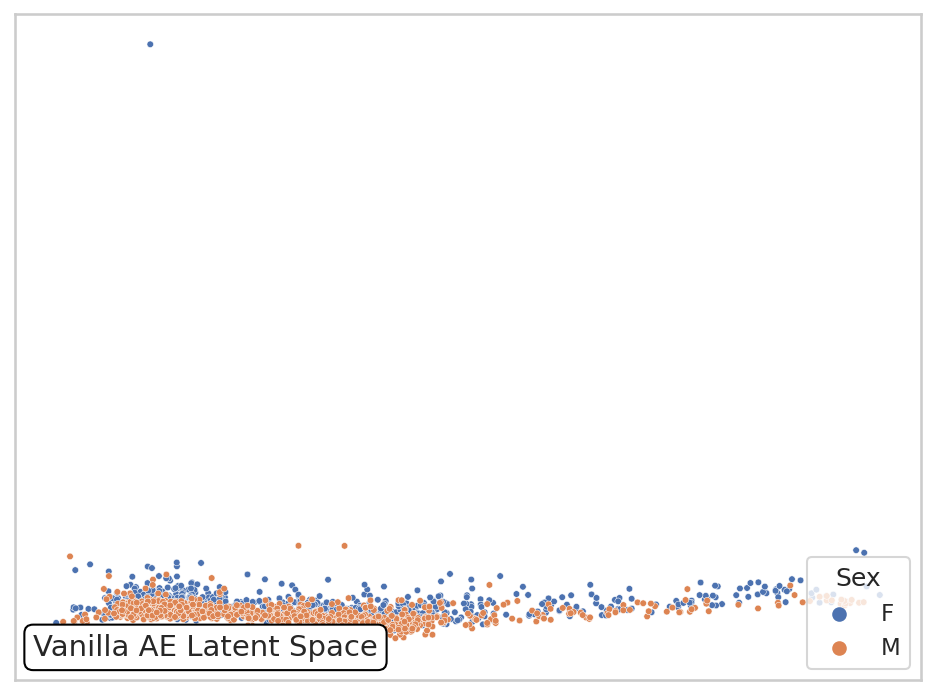

In [27]:
best_model = models.LitAE.load_from_checkpoint("FBC_donors/best_ae_model.ckpt")
best_model.eval()
with torch.no_grad():
    all_embed = best_model(torch.Tensor(data.X.values))

print("Making PHATE plots using data of shape: ", all_embed.shape)

phate_operator_raw = phate.PHATE(n_jobs=-1)
ae_phate = phate_operator_raw.fit_transform(all_embed.detach().numpy())

/home/dk659/bloodcounts_gitlab/feature-disentanglement/experiments/../disentanglement/eval_utils.py:51: UserWarning: Too many points to plot, subsampling...
  warnings.warn("Too many points to plot, subsampling...")


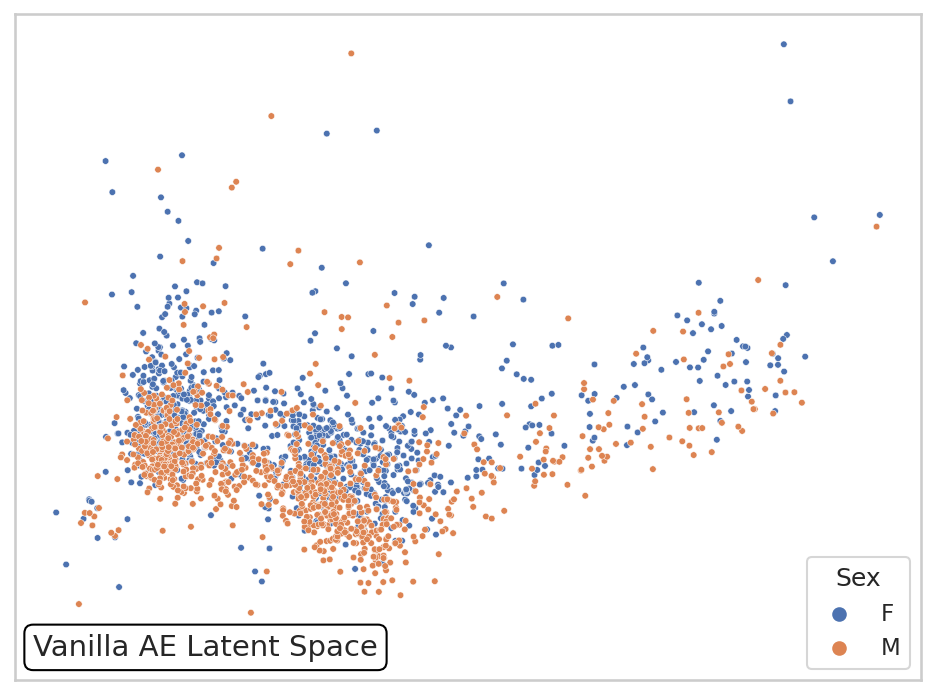

In [42]:
g = make_PHATE_plot(
    hue_var="Sex",
    y_data=data.Y,
    encoder_list=Y_encoder.encoders,
    phate_array=ae_phate,
)

# plt.xlabel("PHATE1")
# plt.ylabel("PHATE2")
plt.xticks([])
plt.yticks([])
# plt.title("Scatterplot of PHATE-embedded latent space")

# these are matplotlib.patch.Patch properties
props = dict(boxstyle="round", facecolor="white", alpha=1.0, edgecolor="black")

# place a text box in upper left in axes coords
g.axes.text(
    0.02,
    0.07,
    "Vanilla AE Latent Space",
    transform=g.axes.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)

plt.legend(title="Sex", loc="lower right")

plt.tight_layout()
plt.savefig("FBC_donors/FBC_AE_PHATE_sex.png")

/home/dk659/bloodcounts_gitlab/feature-disentanglement/experiments/../disentanglement/eval_utils.py:51: UserWarning: Too many points to plot, subsampling...
  warnings.warn("Too many points to plot, subsampling...")


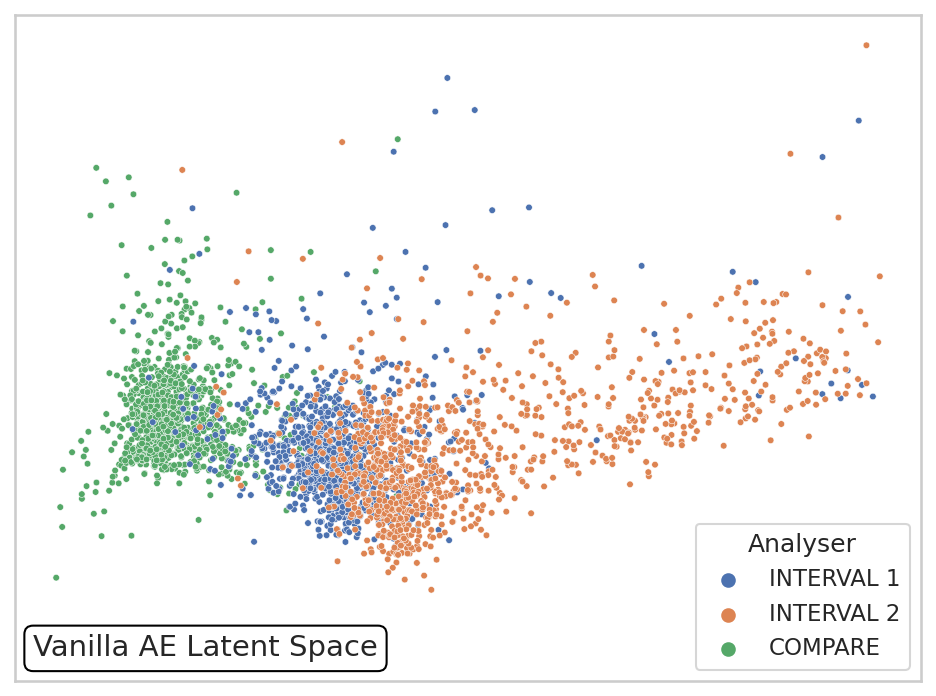

In [41]:
g = make_PHATE_plot(
    hue_var="Analyser ID",
    y_data=data.Y,
    encoder_list=Y_encoder.encoders,
    phate_array=ae_phate,
    hue_order=["INTERVAL 1", "INTERVAL 2", "COMPARE"],
)

# plt.xlabel("PHATE1")
# plt.ylabel("PHATE2")
plt.xticks([])
plt.yticks([])
# plt.title("Scatterplot of PHATE-embedded latent space")

# these are matplotlib.patch.Patch properties
props = dict(boxstyle="round", facecolor="white", alpha=1.0, edgecolor="black")

# place a text box in upper left in axes coords
g.axes.text(
    0.02,
    0.07,
    "Vanilla AE Latent Space",
    transform=g.axes.transAxes,
    fontsize=14,
    verticalalignment="top",
    bbox=props,
)

plt.legend(
    title="Analyser",
    loc="lower right",
    #    labels=["INTERVAL 1", "INTERVAL 2", "COMPARE"]
)

plt.tight_layout()
plt.savefig("FBC_donors/FBC_AE_PHATE_machine.png")